In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.colors as col
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import curve_fit
import pandas as pd
import time

In [11]:
# Oneliner to read xvg file
def read_data(fname):
    data = [ [float(i) for i in line.split()]
             for line in open(fname).readlines()
             if line[0] not in ['#','@'] and len(line.rstrip()) > 0 and
             line.split()[0][0] not in ['#', '@'] ]
    data = pd.DataFrame(data)
    return data

In [12]:
# Oneliner for overlap contours
def transparent_cmap(cmap,N=255):
    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0,0.8,N+4)
    return mycmap

reds = [(1,1,1),(0.9,0.45,0.45),(0.9,0,0)]
purples = [(1,1,1),(0.6,0.3,0.6),(0.6,0,0.6)]
greens = [(1,1,1),(0.45,0.9,0.6),(0,0.9,0.2)]
red1=LinearSegmentedColormap.from_list('red1',reds)
purple1=LinearSegmentedColormap.from_list('purple1',purples)
green1=LinearSegmentedColormap.from_list('green1',greens)
cmap_benz = transparent_cmap(purple1)
cmap_carb = transparent_cmap(red1)
cmap_aliph = transparent_cmap(green1)

In [13]:
# Global Fontsize
axlabelsize=12
fontprops   = {'family':'sans-serif','sans-serif':['Helvetica'],'style':'normal', 'size':10}
mpl.rc('font', **fontprops)

In [14]:
dx,dy=0.02,0.02
y,x = np.mgrid[slice(0,10.98+dy,dy),slice(0,10.36 +dx,dx)]

In [18]:
carb_combined=read_data('carb-capto-hidens.dat')
benz_combined=read_data('benz-capto-hidens.dat')
aliph_combined=read_data('aliph-capto-hidens.dat')

/collab/usr/gapps/python/build/spack-toss3.2/opt/spack/linux-rhel7-x86_64/gcc-4.9.3/python-3.6.4-zx542u32lunrjpa7obuhte2oqanmbfex/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


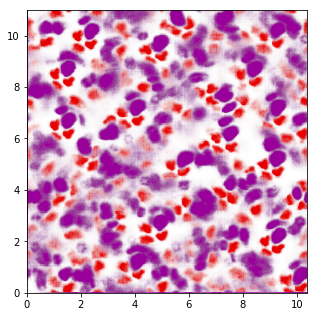

Time Elapsed: 29.10953426361084 seconds


In [19]:
start = time.time()
fig = plt.figure(figsize=(4.5,4.5))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0,0])
#ax1.pcolor(x,y,aliph_combined,cmap=cmap_aliph,vmin=0,vmax=2)
ax1.pcolor(x,y,carb_combined,  cmap=cmap_carb,vmin=0,vmax=2)
ax1.pcolor(x,y,benz_combined,  cmap=cmap_benz,vmin=0,vmax=2)

# Set axes limits
#plt.xlim(-180,180)
#plt.ylim(-180,180)

# Set the tick marks 
ax1.xaxis.set_ticks([0,2,4,6,8,10])
ax1.yaxis.set_ticks([0,2,4,6,8,10])

gs.tight_layout(fig,pad=1.05)


plt.show()

end = time.time()

print('Time Elapsed:', end-start, 'seconds')


In [10]:
#plt.savefig('MMC_HiDens_MoietyMap.png', format='png', bbox_inches='tight')